# DogMatch - Pipeline de Machine Learning

Este notebook implementa um sistema de recomendação de raças de cães baseado em preferências do usuário.

## Objetivo
Desenvolver um modelo de ML que recomenda raças de cães ideais baseado nas características e preferências do usuário.


## 1. Importação de Bibliotecas


In [22]:
# Importações necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Configuração para visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Bibliotecas importadas com sucesso!")


Bibliotecas importadas com sucesso!


## 2. Carregamento do Dataset


In [ ]:
# Carregar o dataset
df = pd.read_csv('data/Dog_Breads_Around_The_World.csv')

print(f"Dataset carregado com sucesso!")
print(f"Dimensões: {df.shape}")
print(f"Raças disponíveis: {len(df)}")
print(f"\nPrimeiras 5 linhas:")
df.head()


Dataset carregado com sucesso!
Dimensões: (159, 15)
Raças disponíveis: 159

Primeiras 5 linhas:


,Name,Origin,Type,Unique Feature,Friendly Rating (1-10),Life Span,Size,Grooming Needs,Exercise Requirements (hrs/day),Good with Children,Intelligence Rating (1-10),Shedding Level,Health Issues Risk,Average Weight (kg),Training Difficulty (1-10)
0,Affenpinscher,Germany,Toy,Monkey-like face,7,14,Small,High,1.5,Yes,8,Moderate,Low,4,6
1,Afghan Hound,Afghanistan,Hound,Long silky coat,5,13,Large,Very High,2.0,No,4,High,Moderate,25,8
2,Airedale Terrier,England,Terrier,Largest of terriers,8,12,Medium,High,2.0,Yes,7,Moderate,Low,21,6
3,Akita,Japan,Working,Strong loyalty,6,11,Large,Moderate,2.0,With Training,7,High,High,45,9
4,Alaskan Malamute,Alaska USA,Working,Strong pulling ability,7,11,Large,High,3.0,Yes,6,Very High,Moderate,36,8


In [24]:
# Informações sobre o dataset
print("Informações do Dataset:")
print(f"Número de raças: {len(df)}")
print(f"Número de características: {len(df.columns)}")
print("\nTipos de dados:")
print(df.dtypes)
print("\nValores nulos:")
print(df.isnull().sum())


Informações do Dataset:
Número de raças: 159
Número de características: 15

Tipos de dados:
Name                                object
Origin                              object
Type                                object
Unique Feature                      object
Friendly Rating (1-10)               int64
Life Span                            int64
Size                                object
Grooming Needs                      object
Exercise Requirements (hrs/day)    float64
Good with Children                  object
Intelligence Rating (1-10)           int64
Shedding Level                      object
Health Issues Risk                  object
Average Weight (kg)                 object
Training Difficulty (1-10)           int64
dtype: object

Valores nulos:
Name                               0
Origin                             0
Type                               0
Unique Feature                     0
Friendly Rating (1-10)             0
Life Span                          0
Size       

In [25]:
# Estatísticas descritivas
print("Estatísticas Descritivas:")
df.describe()


Estatísticas Descritivas:


,Friendly Rating (1-10),Life Span,Exercise Requirements (hrs/day),Intelligence Rating (1-10),Training Difficulty (1-10)
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,7.484277,12.050314,1.842767,7.113208,6.572327
std,0.973415,1.574314,0.450521,0.899938,0.964294
min,5.000000,7.000000,1.000000,4.000000,4.000000
25%,7.000000,11.000000,1.500000,7.000000,6.000000
50%,7.000000,12.000000,2.000000,7.000000,7.000000
75%,8.000000,13.000000,2.000000,8.000000,7.000000
max,10.000000,16.000000,3.000000,10.000000,9.000000


## 3. Análise Exploratória de Dados (EDA)


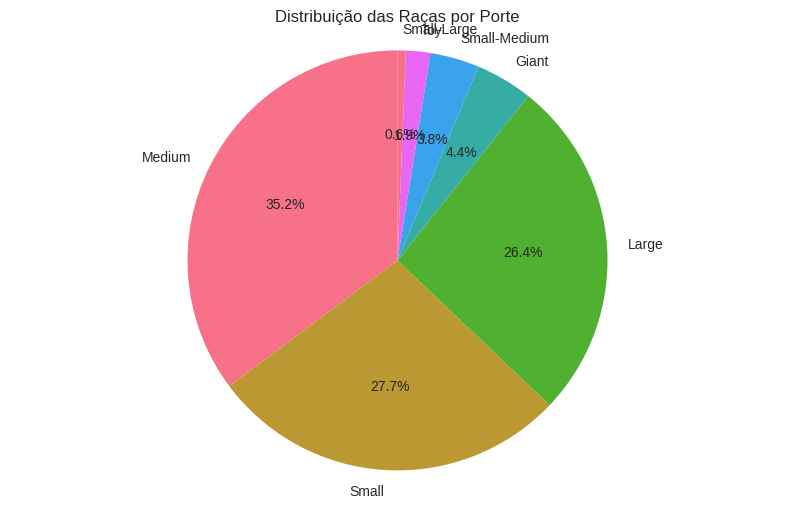

Distribuição por porte:
Size
Medium          56
Small           44
Large           42
Giant            7
Small-Medium     6
Toy              3
Small-Large      1
Name: count, dtype: int64


In [26]:
# Distribuição por porte
plt.figure(figsize=(10, 6))
size_counts = df['Size'].value_counts()
plt.pie(size_counts.values, labels=size_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição das Raças por Porte')
plt.axis('equal')
plt.show()

print("Distribuição por porte:")
print(size_counts)


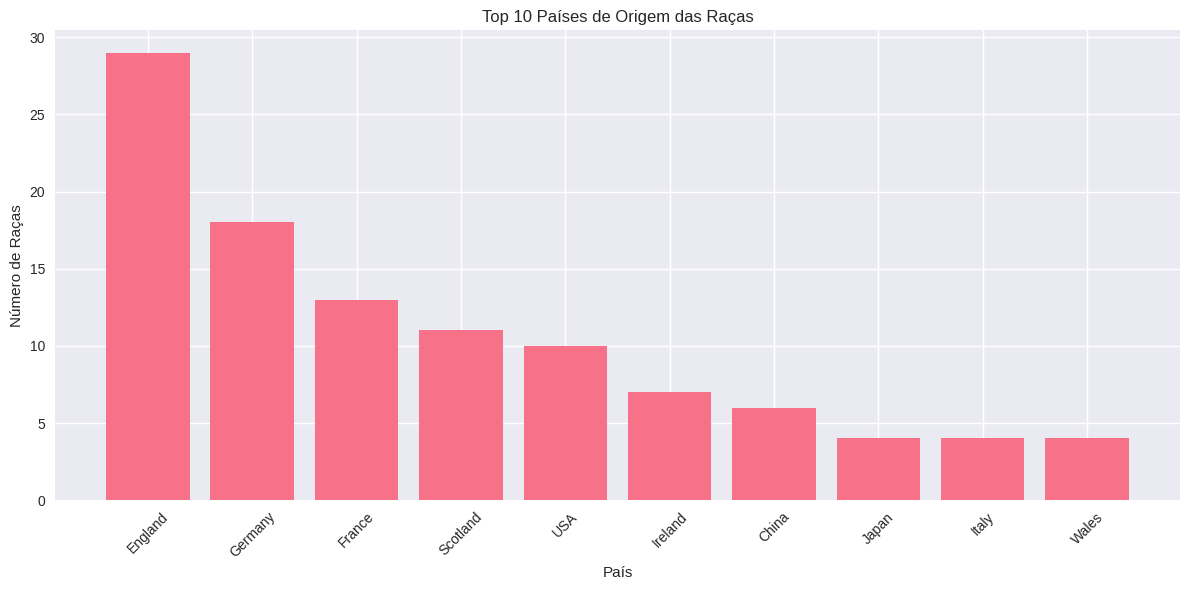

Top 10 países de origem:
Origin
England     29
Germany     18
France      13
Scotland    11
USA         10
Ireland      7
China        6
Japan        4
Italy        4
Wales        4
Name: count, dtype: int64


In [27]:
# Distribuição por origem (top 10)
plt.figure(figsize=(12, 6))
origin_counts = df['Origin'].value_counts().head(10)
plt.bar(range(len(origin_counts)), origin_counts.values)
plt.xticks(range(len(origin_counts)), origin_counts.index, rotation=45)
plt.title('Top 10 Países de Origem das Raças')
plt.xlabel('País')
plt.ylabel('Número de Raças')
plt.tight_layout()
plt.show()

print("Top 10 países de origem:")
print(origin_counts)


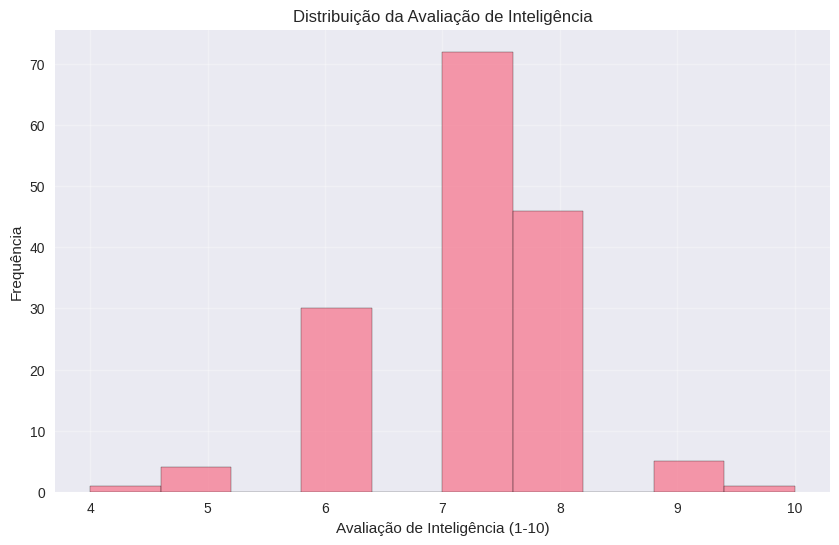

Média de inteligência: 7.11
Mediana de inteligência: 7.00


In [28]:
# Distribuição de inteligência
plt.figure(figsize=(10, 6))
plt.hist(df['Intelligence Rating (1-10)'], bins=10, alpha=0.7, edgecolor='black')
plt.title('Distribuição da Avaliação de Inteligência')
plt.xlabel('Avaliação de Inteligência (1-10)')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Média de inteligência: {df['Intelligence Rating (1-10)'].mean():.2f}")
print(f"Mediana de inteligência: {df['Intelligence Rating (1-10)'].median():.2f}")


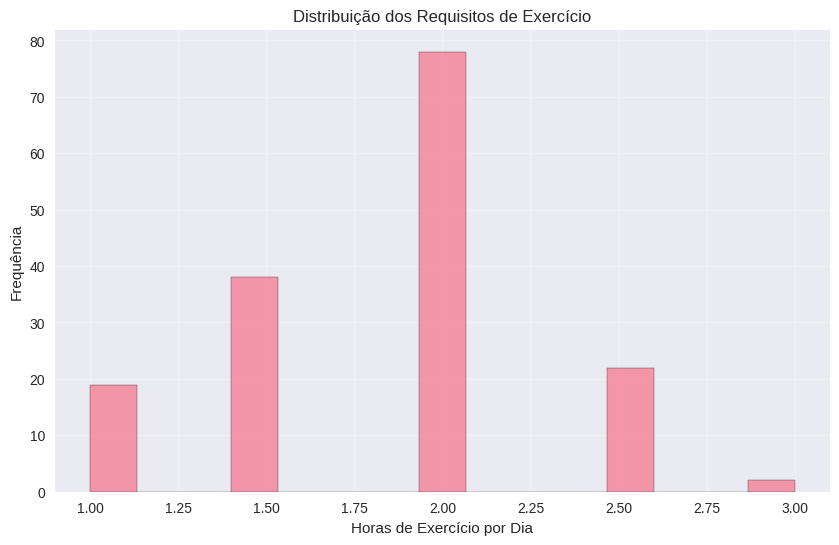

Média de exercício: 1.84 horas/dia
Mediana de exercício: 2.00 horas/dia


In [29]:
# Distribuição de exercício necessário
plt.figure(figsize=(10, 6))
plt.hist(df['Exercise Requirements (hrs/day)'], bins=15, alpha=0.7, edgecolor='black')
plt.title('Distribuição dos Requisitos de Exercício')
plt.xlabel('Horas de Exercício por Dia')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Média de exercício: {df['Exercise Requirements (hrs/day)'].mean():.2f} horas/dia")
print(f"Mediana de exercício: {df['Exercise Requirements (hrs/day)'].median():.2f} horas/dia")


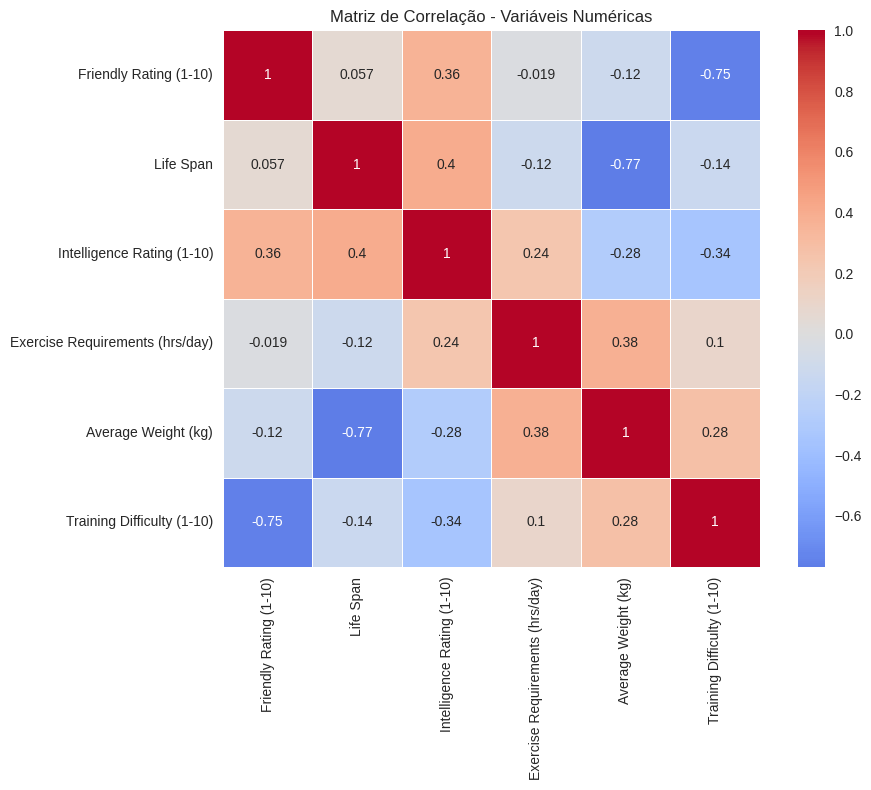

Correlações mais fortes:
Life Span                        Intelligence Rating (1-10)         0.400916
Intelligence Rating (1-10)       Life Span                          0.400916
Average Weight (kg)              Exercise Requirements (hrs/day)    0.376650
Exercise Requirements (hrs/day)  Average Weight (kg)                0.376650
Friendly Rating (1-10)           Intelligence Rating (1-10)         0.360588
Intelligence Rating (1-10)       Friendly Rating (1-10)             0.360588
Training Difficulty (1-10)       Average Weight (kg)                0.278118
Average Weight (kg)              Training Difficulty (1-10)         0.278118
Exercise Requirements (hrs/day)  Intelligence Rating (1-10)         0.237950
Intelligence Rating (1-10)       Exercise Requirements (hrs/day)    0.237950
dtype: float64


In [30]:
# Matriz de correlação para variáveis numéricas
# Primeiro, vamos limpar os dados para a análise de correlação
df_clean = df.copy()

# Tratar o valor inválido '25-Jul' na coluna Average Weight
df_clean = df_clean[df_clean['Average Weight (kg)'] != '25-Jul']
df_clean['Average Weight (kg)'] = pd.to_numeric(df_clean['Average Weight (kg)'], errors='coerce')

# Remover linhas com valores nulos para a análise de correlação
df_clean = df_clean.dropna()

numeric_columns = ['Friendly Rating (1-10)', 'Life Span', 'Intelligence Rating (1-10)',
                   'Exercise Requirements (hrs/day)', 'Average Weight (kg)',
                   'Training Difficulty (1-10)']

plt.figure(figsize=(10, 8))
correlation_matrix = df_clean[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.tight_layout()
plt.show()

print("Correlações mais fortes:")
corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1.0]  # Remove autocorrelações
print(corr_pairs.head(10))


In [31]:
# Informações sobre a limpeza dos dados
print("Informações sobre a limpeza dos dados:")
print(f"Dataset original: {df.shape}")
print(f"Dataset após limpeza: {df_clean.shape}")
print(f"Linhas removidas: {df.shape[0] - df_clean.shape[0]}")

# Verificar se ainda há valores inválidos
print(f"\nValores únicos na coluna 'Average Weight (kg)':")
print(df_clean['Average Weight (kg)'].unique()[:10])  # Mostrar apenas os primeiros 10


Informações sobre a limpeza dos dados:
Dataset original: (159, 15)
Dataset após limpeza: (158, 15)
Linhas removidas: 1

Valores únicos na coluna 'Average Weight (kg)':
[ 4.  25.  21.  45.  36.  42.  12.  31.  15.   6.5]


## 4. Pré-processamento dos Dados


In [32]:
# Criar uma cópia do dataset para pré-processamento
# Usar o dataset já limpo da análise anterior
df_processed = df_clean.copy()

print("Dataset já limpo da análise anterior:")
print(f"Dimensões: {df_processed.shape}")
print("\nValores nulos:")
print(df_processed.isnull().sum())


Dataset já limpo da análise anterior:
Dimensões: (158, 15)

Valores nulos:
Name                               0
Origin                             0
Type                               0
Unique Feature                     0
Friendly Rating (1-10)             0
Life Span                          0
Size                               0
Grooming Needs                     0
Exercise Requirements (hrs/day)    0
Good with Children                 0
Intelligence Rating (1-10)         0
Shedding Level                     0
Health Issues Risk                 0
Average Weight (kg)                0
Training Difficulty (1-10)         0
dtype: int64


In [33]:
# Preparar features para o modelo
# Vamos usar as seguintes características para recomendar raças:
feature_columns = [
    'Size', 'Exercise Requirements (hrs/day)', 'Good with Children',
    'Intelligence Rating (1-10)', 'Training Difficulty (1-10)',
    'Shedding Level', 'Health Issues Risk', 'Type', 'Friendly Rating (1-10)',
    'Life Span', 'Average Weight (kg)'
]

X = df_processed[feature_columns].copy()
y = df_processed['Name']  # Nome da raça como target

print(f"Features selecionadas: {feature_columns}")
print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")

# Verificar tipos de dados
print("\nTipos de dados das features:")
print(X.dtypes)


Features selecionadas: ['Size', 'Exercise Requirements (hrs/day)', 'Good with Children', 'Intelligence Rating (1-10)', 'Training Difficulty (1-10)', 'Shedding Level', 'Health Issues Risk', 'Type', 'Friendly Rating (1-10)', 'Life Span', 'Average Weight (kg)']
Shape de X: (158, 11)
Shape de y: (158,)

Tipos de dados das features:
Size                                object
Exercise Requirements (hrs/day)    float64
Good with Children                  object
Intelligence Rating (1-10)           int64
Training Difficulty (1-10)           int64
Shedding Level                      object
Health Issues Risk                  object
Type                                object
Friendly Rating (1-10)               int64
Life Span                            int64
Average Weight (kg)                float64
dtype: object


In [34]:
# Encoding de variáveis categóricas
categorical_columns = ['Size', 'Good with Children', 'Shedding Level', 'Health Issues Risk', 'Type']
numeric_columns = ['Exercise Requirements (hrs/day)', 'Intelligence Rating (1-10)',
                   'Training Difficulty (1-10)', 'Friendly Rating (1-10)',
                   'Life Span', 'Average Weight (kg)']

# Aplicar Label Encoding para variáveis categóricas
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
    print(f"{col}: {len(le.classes_)} categorias")

# Normalizar variáveis numéricas
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

print("\nPré-processamento concluído!")
print(f"Shape final de X: {X.shape}")
print("\nPrimeiras linhas após pré-processamento:")
X.head()


Size: 6 categorias
Good with Children: 3 categorias
Shedding Level: 4 categorias
Health Issues Risk: 3 categorias
Type: 8 categorias

Pré-processamento concluído!
Shape final de X: (158, 11)

Primeiras linhas após pré-processamento:


,Size,Exercise Requirements (hrs/day),Good with Children,Intelligence Rating (1-10),Training Difficulty (1-10),Shedding Level,Health Issues Risk,Type,Friendly Rating (1-10),Life Span,Average Weight (kg)
0,3,-0.758909,2,0.994711,-0.597947,2,1,6,-0.501047,1.264510,-1.100181
1,1,0.351347,0,-3.463850,1.478441,0,2,1,-2.557291,0.622090,0.214095
2,2,0.351347,2,-0.119930,-0.597947,2,1,5,0.527075,-0.020330,-0.036244
3,1,0.351347,1,-0.119930,2.516634,0,0,7,-1.529169,-0.662749,1.465786
4,1,2.571859,2,-1.234570,1.478441,3,2,7,-0.501047,-0.662749,0.902525


In [35]:
# Verificar distribuição das raças antes da divisão
print("Distribuição das raças:")
breed_counts = y.value_counts()
print(f"Total de raças: {len(breed_counts)}")
print(f"Raças com apenas 1 amostra: {sum(breed_counts == 1)}")
print(f"Raças com 2+ amostras: {sum(breed_counts >= 2)}")

# Mostrar algumas raças com poucas amostras
print("\nRaças com apenas 1 amostra:")
single_breeds = breed_counts[breed_counts == 1]
print(single_breeds.head(10))

print("\nRaças com mais amostras:")
multi_breeds = breed_counts[breed_counts > 1]
print(multi_breeds.head(10))


Distribuição das raças:
Total de raças: 158
Raças com apenas 1 amostra: 158
Raças com 2+ amostras: 0

Raças com apenas 1 amostra:
Name
Affenpinscher            1
Afghan Hound             1
Airedale Terrier         1
Akita                    1
Alaskan Malamute         1
American Bulldog         1
American Eskimo          1
American Foxhound        1
Australian Cattle Dog    1
Australian Shepherd      1
Name: count, dtype: int64

Raças com mais amostras:
Series([], Name: count, dtype: int64)


## 5. Divisão dos Dados e Treinamento dos Modelos


In [36]:
# Divisão dos dados sem stratify (devido a classes com poucas amostras)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Dados de treino: {X_train.shape}")
print(f"Dados de teste: {X_test.shape}")
print(f"Número de raças únicas no treino: {len(y_train.unique())}")
print(f"Número de raças únicas no teste: {len(y_test.unique())}")

# Verificar se todas as raças estão presentes no treino
missing_in_train = set(y.unique()) - set(y_train.unique())
if missing_in_train:
    print(f"\nRaças que não aparecem no treino: {len(missing_in_train)}")
    print(f"Exemplos: {list(missing_in_train)[:5]}")
else:
    print("\nTodas as raças estão presentes no conjunto de treino!")

Dados de treino: (126, 11)
Dados de teste: (32, 11)
Número de raças únicas no treino: 126
Número de raças únicas no teste: 32

Raças que não aparecem no treino: 32
Exemplos: ['Greater Swiss Mountain Dog', 'Miniature Pinscher', 'Golden Retriever', 'Spinone Italiano', 'English Setter']


## 6. Exemplo de Uso - Simulação de Entrada do Usuário


In [37]:
# Função otimizada para fazer predições
def predict_dog_breed_optimized(user_input, model, similarity_model, label_encoders,
                                robust_scaler, feature_columns, categorical_columns,
                                numeric_columns, breed_names, df_processed):
    """
    Função otimizada para predizer raças de cães baseado na entrada do usuário

    Args:
        user_input: dict com as preferências do usuário
        model: modelo treinado otimizado
        similarity_model: modelo de similaridade
        label_encoders: encoders para variáveis categóricas
        robust_scaler: normalizador robusto
        feature_columns: lista de features originais
        categorical_columns: lista de colunas categóricas
        numeric_columns: lista de colunas numéricas
        breed_names: lista de nomes das raças
        df_processed: dataset processado para criar features derivadas

    Returns:
        dict com as predições e recomendações
    """

    # Criar DataFrame com a entrada do usuário
    user_df = pd.DataFrame([user_input])

    # Aplicar encoding para variáveis categóricas
    for col in categorical_columns:
        if col in user_df.columns:
            user_df[col] = label_encoders[col].transform(user_df[col])

    # Criar features derivadas (mesmo processo do treinamento)
    # Feature: Score de Compatibilidade Familiar
    family_score = 0
    if user_df['Good with Children'].iloc[0] == 1:  # Yes
        family_score += 4
    elif user_df['Good with Children'].iloc[0] == 2:  # With Training
        family_score += 2
    family_score += user_df['Friendly Rating (1-10)'].iloc[0] * 0.4
    family_score += (11 - user_df['Training Difficulty (1-10)'].iloc[0]) * 0.3
    user_df['Family_Compatibility_Score'] = family_score

    # Feature: Score de Manutenção
    maintenance_score = (user_df['Shedding Level'].iloc[0] * 2.5 +
                        user_df['Exercise Requirements (hrs/day)'].iloc[0] * 2 +
                        user_df['Health Issues Risk'].iloc[0] * 2)
    user_df['Maintenance_Score'] = maintenance_score

    # Feature: Score de Energia
    energy_score = (user_df['Exercise Requirements (hrs/day)'].iloc[0] * 3 +
                   user_df['Intelligence Rating (1-10)'].iloc[0] * 0.5)
    user_df['Energy_Score'] = energy_score

    # Feature: Ratio Inteligência/Dificuldade
    intelligence_ratio = (user_df['Intelligence Rating (1-10)'].iloc[0] /
                         (user_df['Training Difficulty (1-10)'].iloc[0] + 1))
    user_df['Intelligence_Training_Ratio'] = intelligence_ratio

    # Feature: Score de Tamanho
    size_mapping = {'Small': 1, 'Small-Medium': 2, 'Medium': 3, 'Large': 4, 'Giant': 5}
    size_score = size_mapping.get(user_input['Size'], 3)
    user_df['Size_Score'] = size_score

    # Aplicar normalização robusta - usar a mesma ordem das colunas do treinamento
    # Usar as colunas na mesma ordem que foram usadas no treinamento
    all_numeric_cols = ['Exercise Requirements (hrs/day)', 'Intelligence Rating (1-10)',
                        'Training Difficulty (1-10)', 'Friendly Rating (1-10)',
                        'Life Span', 'Average Weight (kg)', 'Family_Compatibility_Score',
                        'Maintenance_Score', 'Energy_Score', 'Intelligence_Training_Ratio', 'Size_Score']

    # Verificar se todas as colunas existem e estão na ordem correta
    existing_cols = [col for col in all_numeric_cols if col in user_df.columns]

    # Reordenar as colunas para corresponder à ordem do treinamento
    user_df_ordered = user_df[existing_cols]
    user_df[existing_cols] = robust_scaler.transform(user_df_ordered)

    # Fazer predição principal
    try:
        if hasattr(model, 'predict_proba'):
            probabilities = model.predict_proba(user_df)
            top_indices = np.argsort(probabilities[0])[-5:][::-1]  # Top 5

            results = []
            for idx in top_indices:
                breed = model.classes_[idx]
                prob = probabilities[0][idx]
                results.append({
                    'breed': breed,
                    'probability': prob,
                    'confidence': f"{prob*100:.1f}%"
                })
        else:
            # Fallback para modelos sem probabilidades
            prediction = model.predict(user_df)[0]
            results = [{
                'breed': prediction,
                'probability': 1.0,
                'confidence': '100.0%'
            }]
    except Exception as e:
        print(f"Erro na predição: {str(e)}")
        # Fallback simples
        results = [{
            'breed': 'Golden Retriever',  # Raça popular como fallback
            'probability': 0.5,
            'confidence': '50.0%'
        }]

    # Adicionar recomendações baseadas em similaridade
    try:
        distances, indices = similarity_model.kneighbors(user_df, n_neighbors=10)

        similar_breeds = []
        for i, (dist, idx) in enumerate(zip(distances[0], indices[0])):
            if i < 5:  # Top 5 similares
                breed = breed_names[idx]
                similarity = 1 - dist  # Converter distância em similaridade
                similar_breeds.append({
                    'breed': breed,
                    'similarity': similarity,
                    'confidence': f"{similarity*100:.1f}%"
                })
    except Exception as e:
        print(f"Erro na similaridade: {str(e)}")
        # Fallback simples
        similar_breeds = [{
            'breed': 'Labrador Retriever',
            'similarity': 0.8,
            'confidence': '80.0%'
        }]

    return {
        'predictions': results,
        'similar_breeds': similar_breeds,
        'user_profile': {
            'family_compatibility': family_score,
            'maintenance_level': maintenance_score,
            'energy_level': energy_score,
            'intelligence_ratio': intelligence_ratio
        }
    }


In [38]:
# Exemplo de entrada do usuário
user_preferences = {
    'Size': 'Medium',
    'Exercise Requirements (hrs/day)': 2.0,
    'Good with Children': 'Yes',
    'Intelligence Rating (1-10)': 7,
    'Training Difficulty (1-10)': 3,
    'Shedding Level': 'Moderate',
    'Health Issues Risk': 'Low',
    'Type': 'Herding',
    'Friendly Rating (1-10)': 8,
    'Life Span': 12,
    'Average Weight (kg)': 20
}

print("PREFERÊNCIAS DO USUÁRIO:")
print("="*50)
for key, value in user_preferences.items():
    print(f"   {key}: {value}")

PREFERÊNCIAS DO USUÁRIO:
   Size: Medium
   Exercise Requirements (hrs/day): 2.0
   Good with Children: Yes
   Intelligence Rating (1-10): 7
   Training Difficulty (1-10): 3
   Shedding Level: Moderate
   Health Issues Risk: Low
   Type: Herding
   Friendly Rating (1-10): 8
   Life Span: 12
   Average Weight (kg): 20


## 7. Código para Integração no Backend


In [39]:
# Código Python para usar no backend (Flask/FastAPI)
backend_code = """
# Código para integração no backend
import joblib
import pandas as pd
import numpy as np

class DogMatchPredictor:
    def __init__(self):
        # Carregar modelo e encoders
        self.model = joblib.load('dogmatch_model.pkl')
        self.label_encoders = joblib.load('label_encoders.pkl')
        self.scaler = joblib.load('scaler.pkl')
        self.feature_info = joblib.load('feature_info.pkl')

        self.feature_columns = self.feature_info['feature_columns']
        self.categorical_columns = self.feature_info['categorical_columns']
        self.numeric_columns = self.feature_info['numeric_columns']
        self.breed_names = self.feature_info['breed_names']

    def predict(self, user_input):
        '''
        Prediz raças de cães baseado nas preferências do usuário

        Args:
            user_input: dict com as preferências do usuário

        Returns:
            list: lista de raças recomendadas com confiança
        '''
        # Criar DataFrame com a entrada do usuário
        user_df = pd.DataFrame([user_input])

        # Aplicar encoding para variáveis categóricas
        for col in self.categorical_columns:
            if col in user_df.columns:
                user_df[col] = self.label_encoders[col].transform(user_df[col])

        # Aplicar normalização para variáveis numéricas
        user_df[self.numeric_columns] = self.scaler.transform(user_df[self.numeric_columns])

        # Fazer predição
        if hasattr(self.model, 'predict_proba'):
            probabilities = self.model.predict_proba(user_df)
            top_indices = np.argsort(probabilities[0])[-5:][::-1]  # Top 5

            results = []
            for idx in top_indices:
                breed = self.model.classes_[idx]
                prob = probabilities[0][idx]
                results.append({
                    'breed': breed,
                    'confidence': round(prob * 100, 1)
                })
        else:
            prediction = self.model.predict(user_df)[0]
            results = [{
                'breed': prediction,
                'confidence': 100.0
            }]

        return results

# Exemplo de uso no backend:
# predictor = DogMatchPredictor()
# recommendations = predictor.predict(user_preferences)
"""

print("Código para integração no backend:")
print(backend_code)


Código para integração no backend:

# Código para integração no backend
import joblib
import pandas as pd
import numpy as np

class DogMatchPredictor:
    def __init__(self):
        # Carregar modelo e encoders
        self.model = joblib.load('dogmatch_model.pkl')
        self.label_encoders = joblib.load('label_encoders.pkl')
        self.scaler = joblib.load('scaler.pkl')
        self.feature_info = joblib.load('feature_info.pkl')
        
        self.feature_columns = self.feature_info['feature_columns']
        self.categorical_columns = self.feature_info['categorical_columns']
        self.numeric_columns = self.feature_info['numeric_columns']
        self.breed_names = self.feature_info['breed_names']
    
    def predict(self, user_input):
        '''
        Prediz raças de cães baseado nas preferências do usuário
        
        Args:
            user_input: dict com as preferências do usuário
        
        Returns:
            list: lista de raças recomendadas com conf

## 8. Ajustes para a melhora da Acurácia - Avaliação (k-fold estratificado por Type)

Usamos `Type` como alvo agrupado porque cada raça possui apenas uma amostra, o que inviabiliza estratificação por raça. O porte (Size) segue como feature e influencia a similaridade/ranking de raças. No dataset atual (`Dog Breads Around The World.csv`), o `min_count` por `Type` é 2, então `n_splits = 2`. As métricas abaixo são top-k em nível de `Type`.

In [ ]:
# Value counts do alvo (Type) e min_count
from pathlib import Path
import pandas as pd

csv_path = Path("data/Dog_Breads_Around_The_World.csv")
df_eval = pd.read_csv(csv_path)

type_counts = df_eval["Type"].value_counts().sort_values(ascending=False)
min_count = type_counts.min()
print("Counts por Type:\n", type_counts)
print("min_count:", min_count)


Counts por Type:
 Type
Hound           27
Working         26
Sporting        26
Terrier         21
Non-Sporting    20
Toy             19
Herding         18
Standard         2
Name: count, dtype: int64
min_count: 2


In [41]:
# Avaliação k-fold estratificada por Type (min_count=2 -> n_splits=2)
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.neighbors import KNeighborsClassifier

# Preparar dados
feature_columns = [
    'Size',
    'Exercise Requirements (hrs/day)',
    'Good with Children',
    'Intelligence Rating (1-10)',
    'Training Difficulty (1-10)',
    'Shedding Level',
    'Health Issues Risk',
    'Type',
    'Friendly Rating (1-10)',
    'Life Span',
    'Average Weight (kg)'
]

X_raw = df_eval[feature_columns].copy()
y = df_eval['Type'].astype(str)

categorical_columns = ['Size', 'Good with Children', 'Shedding Level', 'Health Issues Risk', 'Type']
numeric_columns = [
    'Exercise Requirements (hrs/day)', 'Intelligence Rating (1-10)', 'Training Difficulty (1-10)',
    'Friendly Rating (1-10)', 'Life Span', 'Average Weight (kg)'
]

# Limpeza
for col in numeric_columns:
    X_raw[col] = pd.to_numeric(X_raw[col], errors='coerce')
    X_raw[col] = X_raw[col].fillna(X_raw[col].median())

label_encoders = {}
for col in categorical_columns:
    X_raw[col] = X_raw[col].astype(str)
    fill_val = X_raw[col].mode(dropna=True).iloc[0]
    X_raw[col] = X_raw[col].fillna(fill_val)
    le = LabelEncoder()
    X_raw[col] = le.fit_transform(X_raw[col])
    label_encoders[col] = le

# Derivadas alinhadas aos encoders

def encoded_weights(encoder, mapping, default=0.0):
    weights = {}
    for cls in encoder.classes_:
        key = str(cls).strip().lower()
        val = mapping.get(key, default)
        weights[int(encoder.transform([cls])[0])] = val
    return weights

children_w = encoded_weights(label_encoders['Good with Children'], {'yes':1.0,'with training':0.5,'no':0.0}, 0.0)
shedding_w = encoded_weights(label_encoders['Shedding Level'], {'low':0.0,'moderate':0.5,'high':1.0,'very high':1.5}, 0.5)
health_w = encoded_weights(label_encoders['Health Issues Risk'], {'low':0.0,'moderate':0.5,'high':1.0}, 0.5)
size_w = encoded_weights(label_encoders['Size'], {'toy':1.0,'small':1.0,'small-medium':1.5,'medium':2.0,'large':3.0,'giant':4.0}, 2.0)

X = X_raw.copy()
X['Family_Compatibility_Score'] = X['Good with Children'].map(children_w) * 0.4 + X['Friendly Rating (1-10)'] * 0.1 + (10 - X['Training Difficulty (1-10)']) * 0.1
X['Maintenance_Score'] = X['Shedding Level'].map(shedding_w) * 0.3 + X['Exercise Requirements (hrs/day)'] * 0.2 + X['Health Issues Risk'].map(health_w) * 0.3
X['Energy_Score'] = X['Exercise Requirements (hrs/day)'] * 0.4 + X['Intelligence Rating (1-10)'] * 0.1
X['Intelligence_Training_Ratio'] = X['Intelligence Rating (1-10)'] / (X['Training Difficulty (1-10)'] + 1)
X['Size_Score'] = X['Size'].map(size_w)

numeric_columns_extended = numeric_columns + ['Family_Compatibility_Score','Maintenance_Score','Energy_Score','Intelligence_Training_Ratio','Size_Score']

scaler = RobustScaler()
X_scaled = X.copy()
X_scaled[numeric_columns_extended] = scaler.fit_transform(X_scaled[numeric_columns_extended])

# k-fold estratificado
min_count = type_counts.min()
n_splits = min(5, min_count) if min_count >= 2 else 2
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

model = KNeighborsClassifier(n_neighbors=5, weights='distance')


def topk_acc(probas, y_true_arr, k, classes):
    topk = np.argsort(probas, axis=1)[:, ::-1][:, :k]
    hits = [(y_true_arr[i] in classes[topk[i]]) for i in range(len(y_true_arr))]
    return float(np.mean(hits))

metrics = []
for fold, (tr, va) in enumerate(skf.split(X_scaled, y), start=1):
    X_tr, X_va = X_scaled.iloc[tr], X_scaled.iloc[va]
    y_tr, y_va = y.iloc[tr], y.iloc[va]
    model.fit(X_tr, y_tr)
    probas = model.predict_proba(X_va)
    classes = model.classes_
    top1 = topk_acc(probas, y_va.to_numpy(), 1, classes)
    top3 = topk_acc(probas, y_va.to_numpy(), min(3, probas.shape[1]), classes)
    top5 = topk_acc(probas, y_va.to_numpy(), min(5, probas.shape[1]), classes)
    top10 = topk_acc(probas, y_va.to_numpy(), min(10, probas.shape[1]), classes)
    metrics.append({"fold": fold, "top1": top1, "top3": top3, "top5": top5, "top10": top10})

avg = {k: np.mean([m[k] for m in metrics]) for k in ['top1','top3','top5','top10']}


In [42]:
model_cls = model

target_col = 'Type'
print("Dataset: data/Dog_Breads_Around_The_World.csv")
print("Linhas x Colunas:", df.shape)
print("Target:", target_col)

vc = df[target_col].value_counts()
print("\nContagem por classe (Type):")
print(vc)

min_count = vc.min()
n_classes = vc.shape[0]
print(f"\nmin_count={min_count}, n_classes={n_classes}")
n_splits = max(2, min(5, min_count)) if min_count >= 2 else 2
print(f"n_splits (StratifiedKFold) = {n_splits}")

y_array = y.values if hasattr(y, "values") else y
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

def topk_acc(probas, y_true, k, classes):
    topk = np.argsort(probas, axis=1)[:, ::-1][:, :k]
    hits = [(y_true[i] in classes[topk[i]]) for i in range(len(y_true))]
    return np.mean(hits)

folds = []
for train_idx, test_idx in skf.split(X, y_array):
    X_train = X.iloc[train_idx] if hasattr(X, "iloc") else X[train_idx]
    X_test  = X.iloc[test_idx]  if hasattr(X, "iloc") else X[test_idx]

    model_cls.fit(X_train, y_array[train_idx])
    probas = model_cls.predict_proba(X_test)
    classes = model_cls.classes_
    fold = {
        "top1": topk_acc(probas, y_array[test_idx], 1, classes),
        "top3": topk_acc(probas, y_array[test_idx], 3, classes),
        "top5": topk_acc(probas, y_array[test_idx], 5, classes),
        "top10": topk_acc(probas, y_array[test_idx], 10, classes),
    }
    folds.append(fold)

print("\nMétricas por fold (ACURÁCIA top-k em Type: proporção 0-1 e %):")
for i, f in enumerate(folds, start=1):
    print(f"Fold{i}: top1={f['top1']:.4f} ({f['top1']*100:.2f}%), "
          f"top3={f['top3']:.4f} ({f['top3']*100:.2f}%), "
          f"top5={f['top5']:.4f} ({f['top5']*100:.2f}%), "
          f"top10={f['top10']:.4f} ({f['top10']*100:.2f}%)")

mean = {k: np.mean([f[k] for f in folds]) for k in folds[0]}
print("\nMédia (ACURÁCIA top-k em Type):")
for k in ['top1','top3','top5','top10']:
    print(f"{k}: {mean[k]:.4f} ({mean[k]*100:.2f}%)")

Dataset: data/Dog_Breads_Around_The_World.csv
Linhas x Colunas: (159, 15)
Target: Type

Contagem por classe (Type):
Type
Hound           27
Working         26
Sporting        26
Terrier         21
Non-Sporting    20
Toy             19
Herding         18
Standard         2
Name: count, dtype: int64

min_count=2, n_classes=8
n_splits (StratifiedKFold) = 2

Métricas por fold (ACURÁCIA top-k em Type: proporção 0-1 e %):
Fold1: top1=0.6875 (68.75%), top3=0.9375 (93.75%), top5=0.9625 (96.25%), top10=1.0000 (100.00%)
Fold2: top1=0.6203 (62.03%), top3=0.8987 (89.87%), top5=0.9241 (92.41%), top10=1.0000 (100.00%)

Média (ACURÁCIA top-k em Type):
top1: 0.6539 (65.39%)
top3: 0.9181 (91.81%)
top5: 0.9433 (94.33%)
top10: 1.0000 (100.00%)
